In [1]:
# Question 3

%matplotlib inline
import numpy as np
from matplotlib import pyplot

def prob():
    N=100000
    x1=np.random.random(N)
    x2=np.random.random(N)
    n=0

    for i in range(N):
        y1=np.sqrt(x1[i])
        if(x2[i]<y1):
            n=n+1
        
    ratio=float(n)/float(N)
    
    return ratio

def SMC(a,b):    # Simple Monte Carlo
    N=100000
    x1=np.random.random(N)
    x2=np.zeros(N)
    sum1=0
    
    for i in range(N):
        x2[i]=np.sqrt(x1[i])
        sum1 = sum1 + x2[i]
    
    value=sum1/N*(b-a)
    return value

# for Importance sampling using P(x)=x, we get an inverse relation x = y^2/2 => y = sqrt(2x)

def ISMC(a,b):   # Importance sampling Monte Carlo
    N=100000
    x0=np.random.random(N)
    x1=np.sqrt(2*x0)
    x2=np.sqrt(2)*x1    
    y1=np.zeros(N)
    sum1=0
    
    for i in range(N):
        deno = np.sqrt(2*x2[i])
        y0 = x1[i]/deno
        y1[i]=y0**2
        sum1 = sum1 + y1[i]
        
    value =sum1/N
    return value


N=200
z1=np.zeros((1,N))
z2=np.zeros((1,N))
for i in range(0,N):
    z1[0][i] = prob()
    z2[0][i] = SMC(0,1)  # since integration limits from a=0,b=1
   
mean1=np.average(z1)
std1=np.std(z1)
st_error1=std1/np.sqrt(N)

mean_SMC=np.average(z2)
std_SMC=np.std(z2)
st_error_SMC=std_SMC/np.sqrt(N)

print('By hit and miss method I=',mean1,'+/-',st_error1)
print('By Simple Monte Carlo I=',mean_SMC,'+/-',st_error_SMC)



By hit and miss method I= 0.66668105 +/- 9.018759331249531e-05
By Simple Monte Carlo I= 0.6667063088407752 +/- 4.6060562137345295e-05


Acceptance Ratio:  0.5826


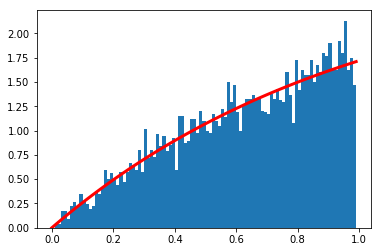

In [2]:
# Random numbers are generated by Von Neumann rejection method

a = 1
N = 10000
NC = a/(a+np.exp(-a)-1)
X = 1
Y = NC*(1-np.exp(-a*X))

x1 = np.random.random(N)*X
y1 = np.random.random(N)*Y

entry = []

n = 0
for i in range(N):
    if(y1[i] <= (NC*(1-np.exp(-a * x1[i])))):
        entry.append(x1[i])
        n = n + 1

x = np.asarray(entry)

print("Acceptance Ratio: ",n/float(N))
binwidth=1/100
pyplot.hist(x,bins=np.arange(0.,X, binwidth),density=True);
pyplot.plot(np.arange(0.,X,binwidth),NC*(1 - np.exp(-a*np.arange(0,X, binwidth))),ls='-',c='red',lw=3);


Minimum variance occurs at a= 4.0


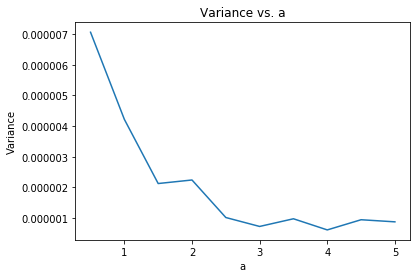

In [3]:
def VonNeumannRN(a):
    N = 10000
    NC=a/(a+np.exp(-a)-1)
    X = 1
    Y = NC*(1-np.exp(-a*X))

    x1 = np.random.random(N)*X
    y1 = np.random.random(N)*Y

    entry = []

    n = 0
    for i in range(N):
        if(y1[i] <= (NC*(1-np.exp(-a * x1[i])))):
            entry.append(x1[i])
            n = n + 1

    x = np.asarray(entry)

    return x,NC

def ISMC(Norm,x,a):
    value = 0
    for i in range(len(x)):
        value = value + np.sqrt(x[i])/(Norm*(1-np.exp(-a * x[i]))) 

    value=value/len(x)
    return value

a_array=[]
var_array=[]
a=0.5

for i in range(10):
    M=50
    list1=np.zeros((1,M))
    for j in range(M):
        b = VonNeumannRN(a)
        x = b[0]
        Normalize = b[1]
        list1[0][j] = ISMC(Normalize,x,a)
    
    variance=(np.std(list1))**2
    a_array.append(a)
    var_array.append(variance)
    a+=0.5

pyplot.figure()
pyplot.plot(a_array,var_array)
pyplot.xlabel('a')
pyplot.ylabel('Variance')
pyplot.title('Variance vs. a')

min_var_pos = np.argmin(var_array)
a_min_var = a_array[min_var_pos]
print('Minimum variance occurs at a=',a_min_var)